In [53]:
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [83]:
#결측치 제거
de_mean = penguins['bill_depth_mm'].mean()
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(de_mean)


le_mean = penguins['bill_length_mm'].mean()
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(le_mean)

In [46]:
cond = penguins['species'].isin(['Adelie', 'Gentoo'])
penguins_data = penguins.loc[cond, ['bill_length_mm', 'bill_depth_mm']]
penguins_data.head()

,bill_length_mm,bill_depth_mm
0,39.10000,18.70000
1,39.50000,17.40000
2,40.30000,18.00000
3,43.92193,17.15117
4,36.70000,19.30000


In [47]:
penguins_target = penguins.loc[cond, ['species']]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_input, test_input, train_target, test_target = train_test_split(penguins_data, penguins_target)

In [35]:
len(train_target)

207

In [36]:
len(test_target)

69

In [37]:
test_target

,species
334,Gentoo
60,Adelie
56,Adelie
31,Adelie
53,Adelie
...,...
292,Gentoo
128,Adelie
295,Gentoo
58,Adelie


In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [57]:
kn.score(test_input, test_target['species'])

0.9855072463768116

In [56]:
kn.predict([[25, 150]])

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

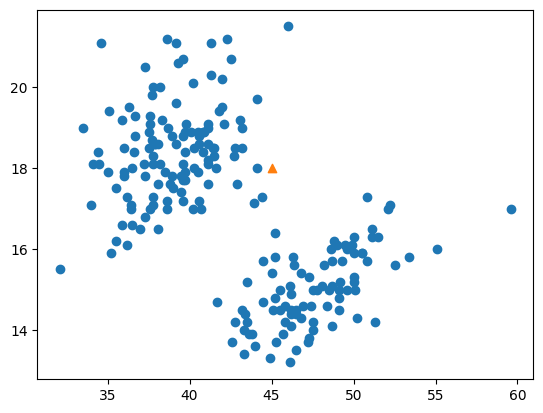

In [88]:
import matplotlib.pyplot as plt

plt.scatter(train_input['bill_length_mm'], train_input['bill_depth_mm'])
plt.scatter(45, 18, marker='^')

In [68]:
kn.kneighbors([[25, 150]]) #가까운거 알려줌 array([[26, 16, 12,  1, 31]]))

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[129.25699207, 129.51602217, 129.67979796, 129.92651769,
         129.95664662]]),
 array([[ 20, 114, 191, 128,  12]]))

In [69]:
#표준점수
mean = train_input.mean() #평균
std = train_input.std()
print(mean)
print(std)

bill_length_mm    42.615565
bill_depth_mm     16.998798
dtype: float64
bill_length_mm    5.119953
bill_depth_mm     2.022090
dtype: float64


In [70]:
train_scaled = (train_input - mean) / std

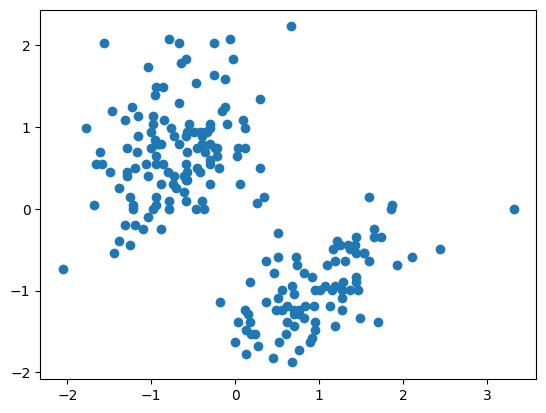

In [82]:
plt.scatter(train_scaled['bill_length_mm'], train_scaled['bill_depth_mm'])

In [72]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [73]:
test_scaled = (test_input - mean) / std

In [74]:
kn.score(test_scaled, test_target)

0.9855072463768116

In [75]:
new = ([25, 150] - mean) / std
new

bill_length_mm    -3.440572
bill_depth_mm     65.774131
dtype: float64

In [76]:
kn.predict([new])

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)